In [1]:
#Importando as bibliotecas

# Data Analysis Tools
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning Tools
import sklearn
import sklearn.mixture as mix
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (10, 10)

def get_sensor_names(tag_names):
    """ Get tagnames starting with sensor.
    
    :param tag_names: Input time series data frame
    
    :return list of string tag names starting with sensor.
    """
    
    return [tag_name for tag_name in tag_names if tag_name.startswith('sensor')]

In [2]:
#Tag Names que foram explicadas no arquivo Challenge Data description 2016
tag_names = ['unit','cycle_num', 'setting1','setting2',
         'setting3', 'sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21']

sensor_columns = get_sensor_names(tag_names)
train_data = pd.read_csv('train.txt', sep=' ', header=None, names=tag_names)

print "O dataset de treino tem {} linhas de dados e {} atributos.".format(*train_data.shape)

O dataset de treino tem 45918 linhas de dados e 26 atributos.


In [100]:
# Mostre a descrição do conjunto de dados

display(train_data.describe())

,unit,cycle_num,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


In [101]:
train_data.head()

,unit,cycle_num,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


Analisando os três *'settings'* para observar alguma correlação.

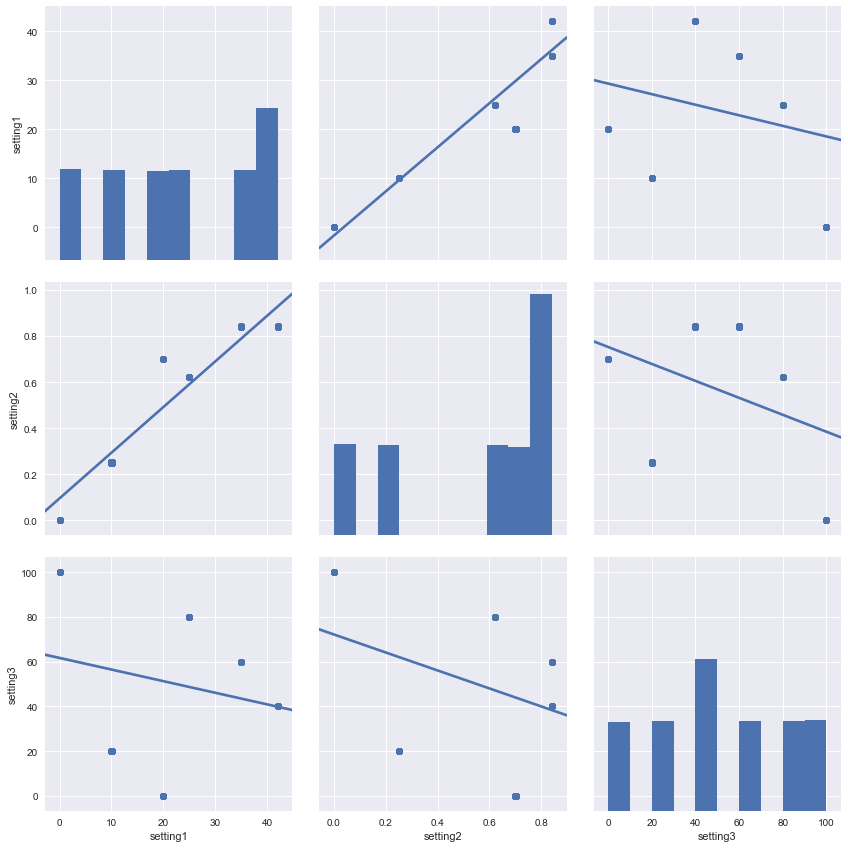

In [4]:
settings_data = train_data[['setting1', 'setting2', 'setting3']]

#display(settings_data)
sns.set(style="darkgrid", color_codes=True)
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados

sns.pairplot(settings_data,kind="reg", size=4)

#sns.jointplot("setting1", "setting2", data=settings_data, kind="reg",
                  #xlim=(0, 50), ylim=(0, 1), color="r", size=7)


Os *'setting1'* e *'setting2'* apresentam uma correlação, aparentemente linear.

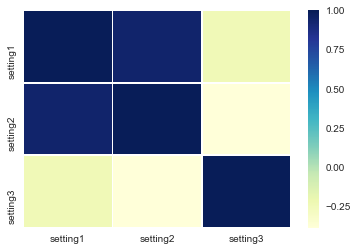

In [5]:
sns.heatmap(settings_data.corr(),annot = False,fmt = ".2f",linewidths=.7,cmap="YlGnBu")

Através do *heatmap* acima há uma evidência considerável sobre a correlação entre *'setting1'* e *'setting2'*

In [73]:
scores= []
cluster_sizes = range(2,10)

#Set a seed value for the random number enerator to get repeatable results
np.random.seed(10)

for num_clusters in cluster_sizes:
    clusterer = KMeans(n_clusters=num_clusters, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
    cluster_labels = clusterer.fit_predict(settings_data)
    
    size = num_clusters
    
    centers = clusterer.cluster_centers_
    
    silh_score = silhouette_score(settings_data.values, cluster_labels, sample_size=2000)
    scores.append(silh_score)
    print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(size))
    #print ('O centro do cluster e: {}'.format(centers))
    
   
print ('\n')    
print 'O número ótimo de cluster é = {}'.format(cluster_sizes[np.argmax(scores)])


('O resultado silh_score e = 0.576914169371', 'para um cluster_size de 2')
('O resultado silh_score e = 0.720651446486', 'para um cluster_size de 3')
('O resultado silh_score e = 0.790367407059', 'para um cluster_size de 4')
('O resultado silh_score e = 0.919990319308', 'para um cluster_size de 5')
('O resultado silh_score e = 0.999854518227', 'para um cluster_size de 6')
('O resultado silh_score e = 0.896507952802', 'para um cluster_size de 7')
('O resultado silh_score e = 0.8374765386', 'para um cluster_size de 8')
('O resultado silh_score e = 0.774207206231', 'para um cluster_size de 9')


O número ótimo de cluster é = 6


In [86]:
n = 6

clusterer = KMeans(n_clusters=n, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
cluster_labels = clusterer.fit_predict(settings_data)
   
centers = clusterer.cluster_centers_
    
silh_score = silhouette_score(settings_data.values, cluster_labels, sample_size=2000)
scores.append(silh_score)
print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(n))
print ('\n')
print ('O centro do cluster e: {}'.format(centers))



('O resultado silh_score e = 0.999858638523', 'para um cluster_size de 6')


O centro do cluster e: [[ 1.00029627e+01  2.50502528e-01  2.00000000e+01]
 [ 3.50030533e+01  8.40489284e-01  6.00000000e+01]
 [ 1.51675295e-03  4.97670406e-04  1.00000000e+02]
 [ 4.20030440e+01  8.40510423e-01  4.00000000e+01]
 [ 2.50030126e+01  6.20516407e-01  8.00000000e+01]
 [ 2.00029465e+01  7.00497164e-01 -7.13384907e-12]]
